# The "lxml" Package and xpath Expressions for Web Scraping

python lxml软件包是用于抓取网页（从中提取数据）的流行工具。 通常，此过程涉及4个步骤：

* 下载（访问并获取）html格式的页面
* “解析”到对象lxml可以使用
* 使用xpath表达式和其他方法浏览html“文档树”（DOM）并抓取数据
* 清洗数据和分析数据

下面的“基本示例”部分介绍了所有这些步骤，以说明该过程。 要下载页面，需要使用requests包的“ get” http方法，已使用请求包实现了get。 通过lxml包中的类来解析页面并使用xpath表达式导航（浏览）文档树。 清理和数据分析已通过字符串操作和pandas程序包执行。 附录部分包含连续性功能，这些功能可用于帮助进行所介绍的分析，但并不局限于此。 附录中的细胞应首先运行！
The "xpath Tutorial" 基于文档 XPath语法：http://www.w3school.com.cn/xpath/xpath_syntax.asp, 通过lxml软件包执行的xpath命令。

#### lxml 简介

lxml包是C库libxml2和libxslt的Python绑定，它兼容但类似于众所周知的ElementTree API。 最新版本适用于python从2.6到3.7的所有CPython版本。

有关此软件包的更多信息，包括安装说明，请访问以下链接：

* [lxml homepage](https://lxml.de/)
* [PyPI page](https://pypi.org/project/lxml/)

## Basic Example --快速入门示例

### 1 Downloading and Parsing

下面的代码使用requests请求包从互联网下载html页面。 然后，使用lxml库中的html类将下载内容解析为适合lxml操作的对象（DOM）。 然后使用xpath表达式从lxml库中提取数据。 然后将其清洗并加载到pandas数据框中，并用于生成简单的条形图。

In [1]:
from lxml import html
import requests

#Getting the page and parsing it
page = requests.get('http://econpy.pythonanywhere.com/ex/001.html')
root = html.fromstring(page.content)
print(html.tostring(root,pretty_print=True).decode('UTF-8'))   #设漂亮打印pretty_print


<html>
<head>
    <meta charset="utf-8">
    <title>Items 1 to 20 -- Example Page 1</title>
    <script type="text/javascript">
      var _gaq = _gaq || [];
      _gaq.push(['_setAccount', 'UA-23648880-1']);
      _gaq.push(['_trackPageview']);
      _gaq.push(['_setDomainName', 'econpy.org']);
    </script>
</head>
<body>
<div align="center">1, <a href="http://econpy.pythonanywhere.com/ex/002.html">[<font color="green">2</font>]</a>, <a href="http://econpy.pythonanywhere.com/ex/003.html">[<font color="green">3</font>]</a>, <a href="http://econpy.pythonanywhere.com/ex/004.html">[<font color="green">4</font>]</a>, <a href="http://econpy.pythonanywhere.com/ex/005.html">[<font color="green">5</font>]</a>
</div>
<div title="buyer-info">
  <div title="buyer-name">Carson Busses</div>
  <span class="item-price">$29.95</span><br>
</div>
<div title="buyer-info">
  <div title="buyer-name">Earl E. Byrd</div>
  <span class="item-price">$8.37</span><br>
</div>
<div title="buyer-info">
  <div title=

[html教程](https://www.w3school.com.cn/h.asp)

### 2 Extracting Data using xpath
先快速学习xpath的基本语法：

<img src='imgs/xpath.png' width="600" height="400" align="left"/>

In [2]:
#This will create a list of buyers:
buyers = root.xpath('//div[@title="buyer-name"]/text()')
print(buyers)

#This will create a list of prices
prices = root.xpath('//span[@class="item-price"]/text()')
print(prices)

['Carson Busses', 'Earl E. Byrd', 'Patty Cakes', 'Derri Anne Connecticut', 'Moe Dess', 'Leda Doggslife', 'Dan Druff', 'Al Fresco', 'Ido Hoe', 'Howie Kisses', 'Len Lease', 'Phil Meup', 'Ira Pent', 'Ben D. Rules', 'Ave Sectomy', 'Gary Shattire', 'Bobbi Soks', 'Sheila Takya', 'Rose Tattoo', 'Moe Tell']
['$29.95', '$8.37', '$15.26', '$19.25', '$19.25', '$13.99', '$31.57', '$8.49', '$14.47', '$15.86', '$11.11', '$15.98', '$16.27', '$7.50', '$50.85', '$14.26', '$5.68', '$15.00', '$114.07', '$10.09']


### 3 Cleaning and Analysing the Data

为了清洗数据，要从价格中删除了美元符号，并且将价格类型从字符串转换为浮点型。 然后将数据插入pandas数据框中，并排序和绘制图表。

In [5]:
#type(prices[0])

In [7]:
import pandas as pd

# cleaning by removing first character and converting to a float
if type(prices[0]) !=float:
    prices = [price[1:] for price in prices]          #列表解析式，去掉第1个位置的美元符号
    prices = [float(price) for price in prices]       #列表解析式，将价格转成浮点型

# inserting data into a data frame & ordering
data = {'Buyers': buyers, 'Prices': prices}          #构造字典
df = pd.DataFrame(data=data)                         #构造数据框
df = df.sort_values(by='Prices', ascending=False)
print(df.head())


                    Buyers  Prices
18             Rose Tattoo  114.07
14             Ave Sectomy   50.85
6                Dan Druff   31.57
0            Carson Busses   29.95
3   Derri Anne Connecticut   19.25


Producing a bar plot of the data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

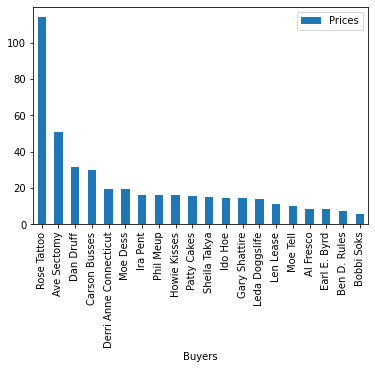

In [9]:
ax = df.plot.bar(x='Buyers', y='Prices')

## xpath 教程

xpath用于查询和过滤以xml格式编写的文档。 可以将html视为xml的一种特定类型，因此也可以使用xpath表达式查询html文档。

根本上，xml文档是节点树（DOM），用于封装具有定义结构的数据，请参见下面的示例。 一旦理解了这种结构，就可以使用xpath表达式导航树并过滤掉数据。

In [10]:
from lxml import etree

# Parsing from a file  当前目录下的simple_xml.xml文件
root = etree.parse("simple_xml.xml")
print("############# Example xml file ###############\n")
print(etree.tostring(root,pretty_print=True).decode('UTF-8'))

############# Example xml file ###############

<bookstore>

<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>

<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  <author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>
</book>

</bookstore>



The xml standard defines 7 types of node:
* element
* attribute
* text
* namespace
* processing-instruction
* comment
* document
<br>有7种类型的节点（Node）：元素、属性、文本、命名空间、处理指令、注释、文档节点（或称为根节点）.

术语：**父代，子代，同级，祖先，后代**以预期的方式定义节点关系。 因此，在上面的示例中，书名title是书book的子代； 书book是书名title的父代； 书名title和价格price是兄弟姐妹； 书名是书的后代，书是书名的始祖。
<br>
<img src='imgs/noderelation.png' width="600" height="400" align="left"/> <br>
<br>以下各节使用上面的示例xml文件演示了xpath表达式的特定方面。

In [12]:
# function used to print nodes

def print_nodes(nodes):
    for node in nodes:
        if type(node).__name__=="_Element":
            print("########### Node start ###############")
            print(etree.tostring(node,pretty_print=True).decode('UTF-8'))
            print("########### Node end ###############")
        elif type(node).__name__=="_ElementUnicodeResult":
            print("########### Node start ###############")
            print("node name = " + node)
            print("node attribute = " + str(node.attrname))
            print("node.is_attribute = " + str(node.is_attribute))
            print("node.is_text = " + str(node.is_text))
            print("node.is_tail = " + str(node.is_tail))
            print("########### Node end ###############")

### 1 node name, attribute name, absolute path and "//"

要提取具有特定名称的节点的所有实例，xpath表达式可以只是节点名称或以“ //”开头的节点名称。 同样，要提取特定属性的所有实例，请在属性名称前加上“ // @”。 请参见下面的代码。

In [13]:
print("######## (1)node name ###########\n")
nodes = root.xpath('book')
print_nodes(nodes)

print("######## (2)//node name ###########\n")
nodes = root.xpath('//book')
print_nodes(nodes)

print("######## (3)//@attribute name ###########\n")
nodes = root.xpath('//@lang')
print_nodes(nodes)

######## (1)node name ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>



########### Node end ###############
########### Node start ###############
<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  <author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>
</book>



########### Node end ###############
######## (2)//node name ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>



########### Node end ######

“ //”运算符可找到“ //”之前的元素节点的所有后代，而节点名称则位于“ //”之后。 因此，在下面的示例中，找到了第二本书的所有作者。

In [14]:
print("######## //second book authors ###########\n")
nodes = root.xpath('/bookstore/book[2]//author')
print_nodes(nodes)


######## //second book authors ###########

########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############


[路径表达式]
1. 绝对路径方式  
绝对路径方式（起始于正斜杠'/'）是从根节点开始导航，逐级而进，像上文提到的实例一样，直到想要抓取的节点。这种方式会让xpath()有更高的效率，稍后解释这点。
2. 相对路径方式  
相对路径方式（双斜杠'//'表达），不用考虑相对于根节点，要抓取的节点所在的所有级别路径。而是只需要知道当前节点上下几个级别的节点即可。在人工定位路径的时候，会更方便一些，但代码执行效率要比绝对路径低一些。

###  XPath实践要注意的问题
**1. 效率问题  **  
如果xpath()的路径表达式参数是从__根元素__开始的，是__定位效率最高__的。这点容易解释，就像在一层办公大楼格子间去寻找一位同事一样。相比指定楼层， 逐个去问，给定一条直通这位同事的地图会更快。  
但是有时候从根元素开始，人工地定位路径表达式的参数并不方便（可以借助插件解决），或者是出于自己封装的解析函数的泛型化的要求，选择相对路径，牺牲些代码效率仍然是明智之举（人力才是最贵资源）。  
以下是我的一些思考测试。  
如果相对路径往上级多写几层，路径变得更加具体，应该会提升效率，但是测试之后，时间反而增加了2-3倍。
初始例子是这样的 ‘//span[@id="media_span"]/span’。
加了几层变成这样‘//div/div/div/span[@id="media_span"]/span’。
推测xpath的索引方式很可能像NTFS文件系统一样。经过统计当篇XML文档的元素个数，span 20个，而div是90个，得证。
所以，在__使用相对路径的时候，div这种极易出现的标签元素尽量不要放在起始节点__。  
从根节点开始解析比以上span开始的例子相比，只快了一点（粗略测试多篇文档，10万次解析差2秒）。  

**2. 不能跨级  **  
在选择路径表达式的时候，__不能出现跨级别的元素__，否则路径表达式是不能被xpath()解析的。  
还拿上图举例，不可以用 /bookstore/price 去解析 book 下面的 price 标签。这是一种跨级。  

**3. 最方便的确定路径参数的方式  **   
审查元素，右键copy xpath（Firefox和chrome都适用），可以直接给出从根开始的xpath路径。

### 2 Predicates（谓词）

谓词用于查找特定节点或特含特定值的节点。 对于上面的示例xml文档，我们可以使用谓词查找第一本书。 前三本书或价格高于£35的图书。 谓词始终在方括号内指定为条件。 所以"//title[@lang='en']" 将找到所有属性lang设置为“ en”的title节点。 

<img src='imgs/Predicates.png' width="600" height="400" align="left"/> <br>

In [15]:
print("######## first node ###########\n")
nodes = root.xpath('/bookstore/book[1]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## last node ###########\n")
nodes = root.xpath('/bookstore/book[last()]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## pos < 2 node ###########\n")
nodes = root.xpath('/bookstore/book[position()<2]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## price greater than 35 nodes ###########\n")
nodes = root.xpath('/bookstore/book[price>35.00]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## price greater than 35 title nodes ###########\n")
nodes = root.xpath('/bookstore/book[price>35.00]/title')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## title nodes with attribute lang  ###########\n")
nodes = root.xpath('//title[@lang]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## title nodes with attribute lang='en' ###########\n")
nodes = root.xpath('//title[@lang="en"]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")


######## first node ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>



########### Node end ###############
length of node list: 1

######## last node ###########

########### Node start ###############
<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  <author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>
</book>



########### Node end ###############
length of node list: 1

######## pos < 2 node ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <las

### 3 Wildcards 通配符选取未知节点

<img src='imgs/Wildcards.png' width="600" height="400" align="left"/> <br>

“ *”运算符用作通配符。 语法“ // book [2] / *”将选择第二本书中的所有元素节点。 语法“ // book [1] / @ *”将选择第一本书中的所有属性节点，语法“ // book [1] / nodes（）”将选择第一本书中所有类型的所有节点 （需要更多的调查，因为不希望自己挑选结点）。 下面的代码演示了这些选择。

In [16]:
print("######## element nodes in the second book ###########\n")
nodes = root.xpath('//book[2]/*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## attributes nodes in the first book  ###########\n")
nodes = root.xpath('//book[1]//@*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## all nodes in the first book ###########\n")
nodes = root.xpath('//book[1]//node()')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

######## element nodes in the second book ###########

########### Node start ###############
<title lang="en">Learning XML</title>
  

########### Node end ###############
########### Node start ###############
<price currency="dollars">39.95</price>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 4

######## attributes nodes in the first book  ###########

########### Node start ###############
node name = ge
node attribute = lang
node.is_attribute = True
node.is_text = False
node.is_tail = False
########### Node end ###############
########### Node start ###############
node name = pounds
node attribute = currency
node.is_attri

### 4 Axes（轴）
<img src='imgs/axes.png' width="600" height="300" align="left"/> <br>

xpath "axes" 轴可定义相对于当前节点的节点集。例如 xpath 语法 "//firstname/parent::*", 轴 parent 选则 "firstname" 节点的parents节点. 轴后可跟路径与步，例如前面的：：。下面的代码演示了如何使用“轴”语法。

In [17]:
print("######## parents of firstname nodes ###########\n")
nodes = root.xpath('//firstname/parent::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## ancestors of firstname nodes ###########\n")
nodes = root.xpath('//firstname/ancestor::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## attribute of firstname nodes ###########\n")
nodes = root.xpath('//author/attribute::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("########  child of author nodes ###########\n")
nodes = root.xpath('//author/child::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("########  following-sibling of price ###########\n")
nodes = root.xpath('//price/following-sibling::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")



######## parents of firstname nodes ###########

########### Node start ###############
<author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>


########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 3

######## ancestors of firstname nodes ###########

########### Node start ###############
<bookstore>

<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>

<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <a

#### 位置路径表达（Location Path Expression）

* absolute path  /step/step/step
* relative path  - step/step/step

步（step）的语法:

"axisname::nodetest[predicate]"

E.g. /bookstore/book[2]/author/child::firstname

将在第二本书book节点中选择所有属于作者author子节点的名字firstname节点。

In [18]:
print("######## firstname children of author in book 2 ###########\n")
nodes = root.xpath('/bookstore/book[2]/author/child::firstname')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## all children of book 2 ###########\n")
nodes = root.xpath('/bookstore/book[2]/child::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## the second author of book 2 ###########\n")
nodes = root.xpath('/bookstore/book[2]/descendant::author[position()=2]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")



######## firstname children of author in book 2 ###########

########### Node start ###############
<firstname>John</firstname>
    

########### Node end ###############
########### Node start ###############
<firstname>Fred</firstname>
    

########### Node end ###############
length of node list: 2

######## all children of book 2 ###########

########### Node start ###############
<title lang="en">Learning XML</title>
  

########### Node end ###############
########### Node start ###############
<price currency="dollars">39.95</price>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 4

######## the second author of book 2 ###

<img src='imgs/step.png' width="600" height="300" align="left"/> <br>

### 5 Operators（运算符）

“ |” 符号可用于指定一个xpath表达式或另一个。 例如。 “ // book / title | // book / author”。 “and”和“or”运算符可用于指定更复杂的谓词。 例如。 // book [price <40 and price> 30]将选择价格大于30磅且小于40磅的所有书籍。 同样，// book [2] / author [firstname =“ John”or firstname =“ Fred”]将选择第二本书中所有名字为John或Fred的作者。

<img src='imgs/Operators.png' width="600" height="300" align="left"/> <br>

In [19]:
print("######## selecting title or author within the book node ###########\n")
nodes = root.xpath('//book/title | //book/author')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## selecting books with price less than 40 or greater than 30 ###########\n")
nodes = root.xpath('//book[price < 40 and price > 30]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## selecting authors with firstname John or Fred in the second book ###########\n")
nodes = root.xpath('//book[2]/author[firstname="John" or firstname="Fred"]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

######## selecting title or author within the book node ###########

########### Node start ###############
<title lang="ge">
    Harry Potter
  </title>
  

########### Node end ###############
########### Node start ###############
<author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>


########### Node end ###############
########### Node start ###############
<title lang="en">Learning XML</title>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 5

######## selecting books with price less than 40 or greater than 30 ###########

########### Node start ###############
<book>
  <title la

### 练习
1)、请求获取豆瓣-三生三世电影的评论页面：  https://movie.douban.com/subject/25823277/comments?status=P

2)、请求并获取安普网维生素相关化工品是网页信息：  http://www.anpel.com.cn/Searchnew.aspx?Types=6&Type=0&KeyWord=CDCT

In [20]:
#Getting the page and parsing it
get_url=' https://movie.douban.com/subject/25823277/comments?status=P'
ss=requests.Session()   #设置会话方式请求

#设置User-Agent信息
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:70.0) Gecko/20100101 Firefox/70.0'
}

pageDB = ss.get(get_url,headers=headers)
#print(pageDB.text)

In [21]:
rootDB = html.fromstring(pageDB.text)
print(rootDB)
strs = (html.tostring(rootDB, encoding = "utf-8", pretty_print = True))
print(strs)  #设漂亮打印pretty_print

<Element html at 0x221fc7c06d8>
b'<html lang="zh-CN" class="ua-windows ua-ff70">\n<head>\n    \n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw">\n    <title>\n\n\xe4\xb8\x89\xe7\x94\x9f\xe4\xb8\x89\xe4\xb8\x96\xe5\x8d\x81\xe9\x87\x8c\xe6\xa1\x83\xe8\x8a\xb1 \xe7\x9f\xad\xe8\xaf\x84\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE">\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <meta name="keywords" content="\xe4\xb8\x89\xe7\x94\x9f\xe4\xb8\x89\xe4\xb8\x96\xe5\x8d\x81\xe9\x87\x8c\xe6\xa1\x83\xe8\x8a\xb1,\xe5\xbd\xb1\xe8\xae\xaf,\xe6\x8e\x92\xe7\x89\x87,\xe6\x94\xbe\xe6\x98\xa0\xe6\x97\xb6\xe9\x97\xb4,\xe7\x94\xb5\xe5\xbd\xb1\xe7\xa5\xa8\xe4\xbb\xb7,\xe5\x9c\xa8\xe7\xba\xbf\xe8\xb4\xad\xe7\xa5\xa8">\n    <meta name="description" co

In [22]:
review=rootDB.xpath('//span[@class="short"]/text()')[0]
print(review)

我姐是不是很恨我，每次都请我看这种电影TAT


## lxml扩展

### 1 文件解析与输出（问题1）
>这部分讲述如何将XML文件解析为Element对象，以及如何将Element对象输出为XML文件。

#### 1.1.文件解析

__文件解析常用的有fromstring、XML和HTML三个方法。接受的参数都是字符串__

In [4]:
from lxml import etree

In [5]:
xml_data = '<root>data</root>'

In [6]:
root1=etree.fromstring(xml_data)    ## fromstring方法
print(root1.tag)
print(etree.tostring(root1))

root
b'<root>data</root>'


In [7]:
root2=etree.XML(xml_data)           ## XML方法，与fromstring方法基本一样
print(root2.tag)
print(etree.tostring(root2))

root
b'<root>data</root>'


In [8]:
root3=etree.HTML(xml_data)         ## HTML方法，如果没有<html>和<body>标签，会自动补上
print(root3.tag)
print(etree.tostring(root3))

html
b'<html><body><root>data</root></body></html>'


#### 1.2.输出

__输出其实就是前面一直在用的tostring方法了，这里补充xml_declaration和encoding两个参数，前者是XML声明，后者是指定编码__

In [9]:
root = etree.XML('<root><a><b/></a></root>')
print(etree.tostring(root))

b'<root><a><b/></a></root>'


In [10]:
print(etree.tostring(root,xml_declaration=True))   ## XML声明

b"<?xml version='1.0' encoding='ASCII'?>\n<root><a><b/></a></root>"


In [11]:
print(etree.tostring(root,encoding='iso-8859-1'))   ## 指定编码

b"<?xml version='1.0' encoding='iso-8859-1'?>\n<root><a><b/></a></root>"


## 2 ElementPath(问题2)
>讲ElementPath前，需要引入ElementTree类，一个ElementTree对象可理解为一个完整的XML树，每个节点都是一个Element对象。  
而ElementPath则相当于XML中的XPath。用于搜索和定位Element元素

__这里介绍两个常用方法，可以满足大部分搜索、查询需求，它们的参数都是XPath语句：__

    - findall()：返回所有匹配的元素，返回列表  
    - find()：返回匹配到的第一个元素

In [12]:
root = etree.XML("<root><a x='123'>aText<b>test<c/>Tset</b></a><b>bText</b></root>")
print(etree.tostring(root,pretty_print=True))

b'<root>\n  <a x="123">aText<b>test<c/>Tset</b></a>\n  <b>bText</b>\n</root>\n'


In [13]:
## 查找第一个b标签
print(root.find('b'))
print(root.find('b').text)
print(root.find('.//b').text)
print(root.find('a'))
print(root.find('a').text)
print(root.find('a').tag)

<Element b at 0x1d8bc2a4a48>
bText
test
<Element a at 0x1d8bc2a4b48>
aText
a


In [14]:
## 查找所有b标签，返回Element对象组成的列表
[b.text for b in root.findall('.//b')]

['test', 'bText']

In [15]:
## 根据属性查询
print(root.findall('.//a[@x]')[0].tag)

a


In [16]:
print(root.findall('.//a[@y]'))

[]


In [17]:
print(root.xpath('//a/text()') )

['aText']


In [18]:
print(root.xpath('//b/text()'))

['test', 'Tset', 'bText']


## 3 lxml_XPath查找定位

In [19]:
from lxml import etree
text = '''
<div>
    <ul>
         <li class="item-0"><a href="link1.html">first item</a></li>
         <li class="item-1"><a href="link2.html">second item</a></li>
         <li class="item-inactive"><a href="link3.html"><span class="bold">third item</span></a></li>
         <li class="item-1"><a href="link4.html">fourth item</a></li>
         <li class="item-0"><a href="link5.html">fifth item</a>
     </ul>
 </div>
'''
html = etree.HTML(text)              ## lxml 因为继承了 libxml2 的特性，具有自动修正 HTML 代码的功能,补全了 li 标签，还添加了 body，html 标签
result = etree.tostring(html)
print(result)

b'<html><body><div>\n    <ul>\n         <li class="item-0"><a href="link1.html">first item</a></li>\n         <li class="item-1"><a href="link2.html">second item</a></li>\n         <li class="item-inactive"><a href="link3.html"><span class="bold">third item</span></a></li>\n         <li class="item-1"><a href="link4.html">fourth item</a></li>\n         <li class="item-0"><a href="link5.html">fifth item</a>\n     </li></ul>\n </div>\n</body></html>'


In [20]:
result = html.xpath('//li')   ## 获取所有li标签
print(result)
print(len(result))
print(type(result))
print(type(result[0]))            ## 每个元素都是 Element 类型

[<Element li at 0x1d8bc2a4c88>, <Element li at 0x1d8bc2be548>, <Element li at 0x1d8bc2be3c8>, <Element li at 0x1d8bc2be388>, <Element li at 0x1d8bc2be808>]
5
<class 'list'>
<class 'lxml.etree._Element'>


In [21]:
print(html.xpath('//li/@class') )          ## 获取 <li> 标签的所有 class

['item-0', 'item-1', 'item-inactive', 'item-1', 'item-0']


In [22]:
print(html.xpath('//li/a[@href="link3.html"]') )       ## 获取 <li> 标签下 href 为 link1.html 的 <a> 标签

[<Element a at 0x1d8bc2be848>]


In [23]:
print(html.xpath('//li//span'))       ## 获取 <li> 标签下的所有 <span> 标签,注意要用‘//span’，因为<span> 并不是 <li> 的子元素，不能跨级

[<Element span at 0x1d8bc2bea88>]


In [24]:
print(html.xpath('//li/a//@class') )      ## 获取 <li> 标签下的所有 class，不包括 <li>

['bold']


In [25]:
print(html.xpath('//li[last()]/a/@href') )           ## 获取最后一个 <li> 的 <a> 的 href

['link5.html']


In [26]:
print(html.xpath('//li[last()-1]//text()'))        ## 获取倒数第二个元素的内容

['fourth item']


In [27]:
print(html.xpath('//*[@class="bold"]')[0].tag )         ## 获取 class 为 bold 的标签名

span
